## Давайте на примере подробно разберём проектирование экспериментов и построение пайплайна. 

### Первым этапом данных является загрузка данных: 

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\govor\AppData\Local\Temp\ipykernel_6608\1702592043.py:3: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")


Text(0.5, 1.0, 'Соотношение людей, которые пропускали прием и нет')

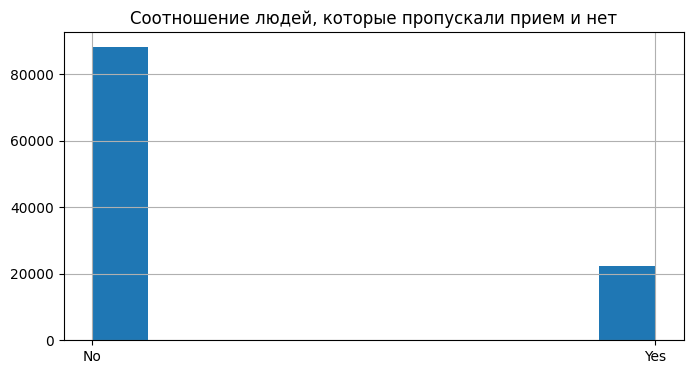

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")
# Создаем поле для графика
plt.figure(figsize=(8,4))
# Создаем гистрограмму 
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускали прием и нет')


Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:
- Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
- Кто не появляется чаще — мужчины или женщины?

In [15]:
# Для более точных цифр
df['No-show'].value_counts(normalize=True).round(3)

No-show
No     0.798
Yes    0.202
Name: proportion, dtype: float64

In [16]:
# Кто не посещает больше
df[df['No-show']=='Yes']['Gender'].value_counts(normalize=True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

In [17]:
categorical_lolumns=['Gender', 'Neighbourhood']
encoding_columns=pd.get_dummies(df, columns=categorical_lolumns)

In [18]:
import os.path
import logging
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [19]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2025-04-02 21:43:37,639: Data
INFO: 2025-04-02 21:43:37,640: Data shape (110527, 14)
C:\Users\govor\AppData\Local\Temp\ipykernel_6608\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2025-04-02 21:43:37,653: Percentage of women: 0.653882342398853
C:\Users\govor\AppData\Local\Temp\ipykernel_6608\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2025-04-02 21:43:37,667: P